In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [107]:
def binary_operation(X, operation):
    if operation == 'XOR':
        return np.logical_xor(X[:, 0], X[:, 1]).astype(int).reshape(-1, 1)
    elif operation == 'AND':
        return np.logical_and(X[:, 0], X[:, 1]).astype(int).reshape(-1, 1)
    elif operation == 'OR':
        return np.logical_or(X[:, 0], X[:, 1]).astype(int).reshape(-1, 1)
    else:
        raise ValueError(f"Unknown operation: {operation}")

In [108]:
def generate_noisy_data(n_samples, operation, noise=0.1):
    X = np.random.randint(0, 2, size=(n_samples, 2))  
    X_noisy = X + np.random.normal(0, noise, X.shape) 
    y = binary_operation(X, operation)  
    return X, X_noisy, y

In [109]:
def initialize_network(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size)
    W2 = np.random.randn(hidden_size, output_size)
    b1 = np.zeros((1, hidden_size))
    b2 = np.zeros((1, output_size))
    return W1, W2, b1, b2

In [110]:
def forward_pass(X, W1, W2, b1, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a1, a2

In [111]:
def backward_pass(X, y, a1, a2, W1, W2, b1, b2, lr):

    output_error = a2 - y
    d_output = output_error * sigmoid_derivative(a2)
    

    hidden_error = d_output.dot(W2.T)
    d_hidden = hidden_error * sigmoid_derivative(a1)
    

    W2 -= a1.T.dot(d_output) * lr
    W1 -= X.T.dot(d_hidden) * lr
    b2 -= np.sum(d_output, axis=0, keepdims=True) * lr
    b1 -= np.sum(d_hidden, axis=0, keepdims=True) * lr
    
    return W1, W2, b1, b2

In [112]:
def train_network(X_train, y_train, X_test, y_test, hidden_size, epochs, lr, batch_size):
    input_size = X_train.shape[1]
    output_size = 1
    

    W1, W2, b1, b2 = initialize_network(input_size, hidden_size, output_size)
    
    training_loss = []
    testing_loss = []
    training_accuracy = []
    testing_accuracy = []
    

    for epoch in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]
            

            a1, a2 = forward_pass(X_batch, W1, W2, b1, b2)
            

            W1, W2, b1, b2 = backward_pass(X_batch, y_batch, a1, a2, W1, W2, b1, b2, lr)
        

        _, train_output = forward_pass(X_train, W1, W2, b1, b2)
        train_loss = np.mean((y_train - train_output) ** 2)
        train_acc = np.mean(np.round(train_output) == y_train)
        
        _, test_output = forward_pass(X_test, W1, W2, b1, b2)
        test_loss = np.mean((y_test - test_output) ** 2)
        test_acc = np.mean(np.round(test_output) == y_test)
        
        training_loss.append(train_loss)
        training_accuracy.append(train_acc)
        testing_loss.append(test_loss)
        testing_accuracy.append(test_acc)
    
    return training_loss, testing_loss, training_accuracy, testing_accuracy

In [113]:
def plot_metrics(metrics, operations):
    for op in operations:
        plt.figure(figsize=(12, 6))
        num_samples = metrics[op]['n_samples']
        b_size = metrics[op]['batch_size']

        plt.subplot(1, 2, 1)
        plt.plot(metrics[op]['train_loss'], label=f'Train Loss')
        plt.plot(metrics[op]['test_loss'], label=f'Test Loss')
        plt.title(f'{op} Loss over Epochs ( n = {num_samples} samples, batch size = {b_size})')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()


        plt.subplot(1, 2, 2)
        plt.plot(metrics[op]['train_acc'], label=f'Train Accuracy')
        plt.plot(metrics[op]['test_acc'], label=f'Test Accuracy')
        plt.title(f'{op} Accuracy over Epochs ( n = {num_samples} samples, batch size = {b_size})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

In [114]:
def main():

    n_samples = 100
    noise_level = 0.1
    hidden_size = 2
    epochs = 1000 #1000 epochs
    lr = 0.1
    batch_size = 16
    operations = ['XOR', 'AND', 'OR']
    

    metrics = {}
    
    for operation in operations:
        print(f'Training for {operation} operation...')
        

        X, X_noisy, y = generate_noisy_data(n_samples, operation, noise=noise_level)
        

        split_idx = int(0.8 * n_samples)
        X_train, X_test = X_noisy[:split_idx], X_noisy[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        

        train_loss, test_loss, train_acc, test_acc = train_network(X_train, y_train, X_test, y_test, hidden_size, epochs, lr, batch_size)
        

        metrics[operation] = {
            'train_loss': train_loss,
            'test_loss': test_loss,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'n_samples' : n_samples,
            'batch_size' : batch_size
        }
        

        print(f'{operation} Final Train Loss: {train_loss[-1]}, Final Test Loss: {test_loss[-1]}')
        print(f'{operation} Final Train Accuracy: {train_acc[-1]}, Final Test Accuracy: {test_acc[-1]}\n')
    

    plot_metrics(metrics, operations)

Training for XOR operation...
XOR Final Train Loss: 0.001026486732105217, Final Test Loss: 0.00121206585512676
XOR Final Train Accuracy: 1.0, Final Test Accuracy: 1.0

Training for AND operation...
AND Final Train Loss: 0.0008874084540126074, Final Test Loss: 0.001189265478398978
AND Final Train Accuracy: 1.0, Final Test Accuracy: 1.0

Training for OR operation...
OR Final Train Loss: 0.0003275662828568067, Final Test Loss: 0.00041232218617926207
OR Final Train Accuracy: 1.0, Final Test Accuracy: 1.0



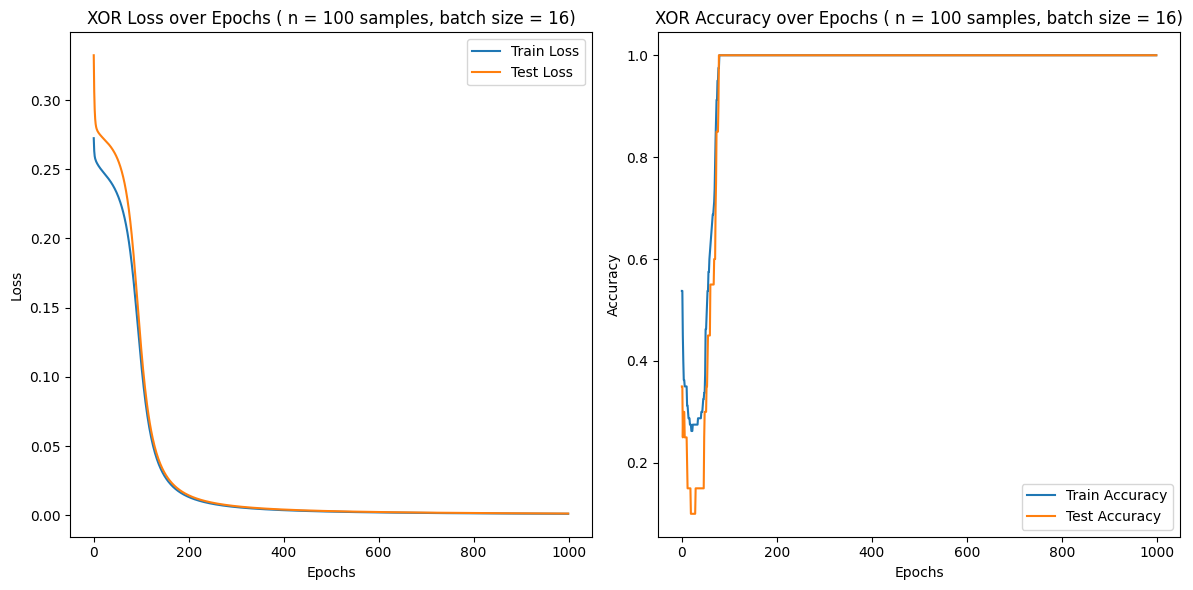

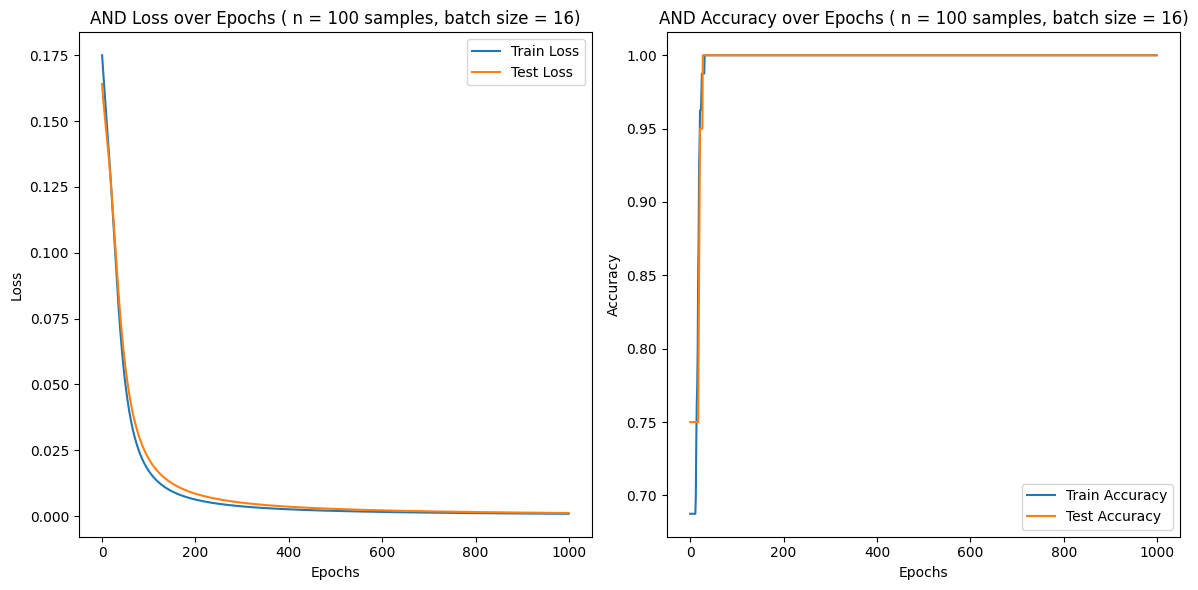

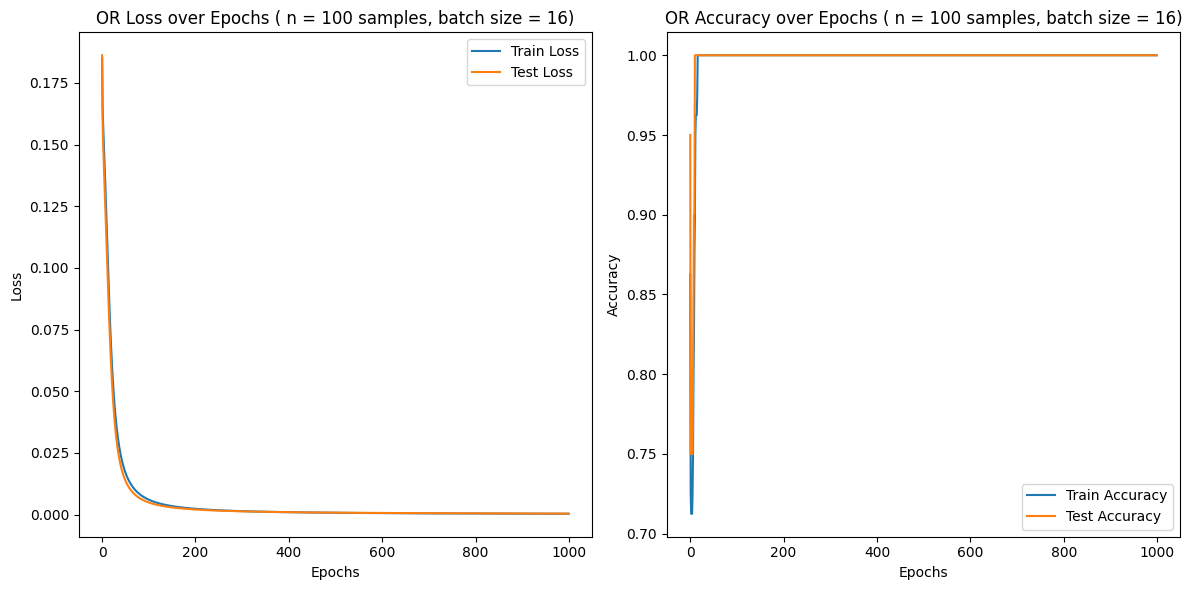

In [115]:
main()

3 different choices of n (100 epochs)

Training for XOR operation... with 50 samples
XOR Final Train Loss: 0.20457504269203133, Final Test Loss: 0.24988080760305972
XOR Final Train Accuracy: 0.7, Final Test Accuracy: 0.6

Training for AND operation... with 50 samples
AND Final Train Loss: 0.07905977815031792, Final Test Loss: 0.1418109751290655
AND Final Train Accuracy: 0.9, Final Test Accuracy: 0.8

Training for OR operation... with 50 samples
OR Final Train Loss: 0.1311865109675438, Final Test Loss: 0.12716219441260718
OR Final Train Accuracy: 0.8, Final Test Accuracy: 0.8



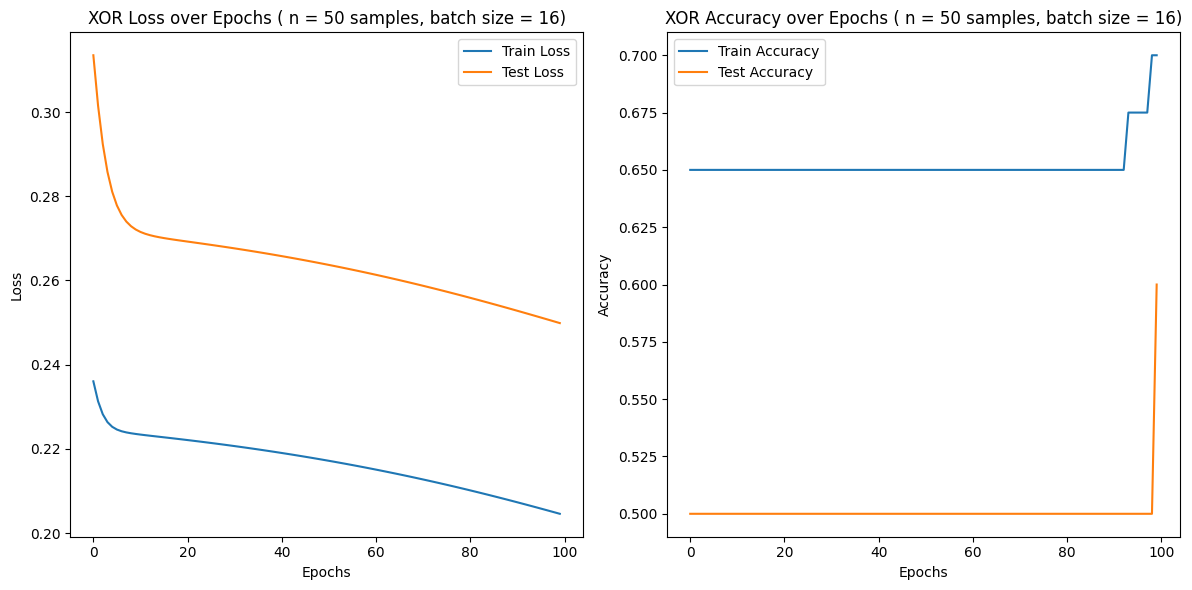

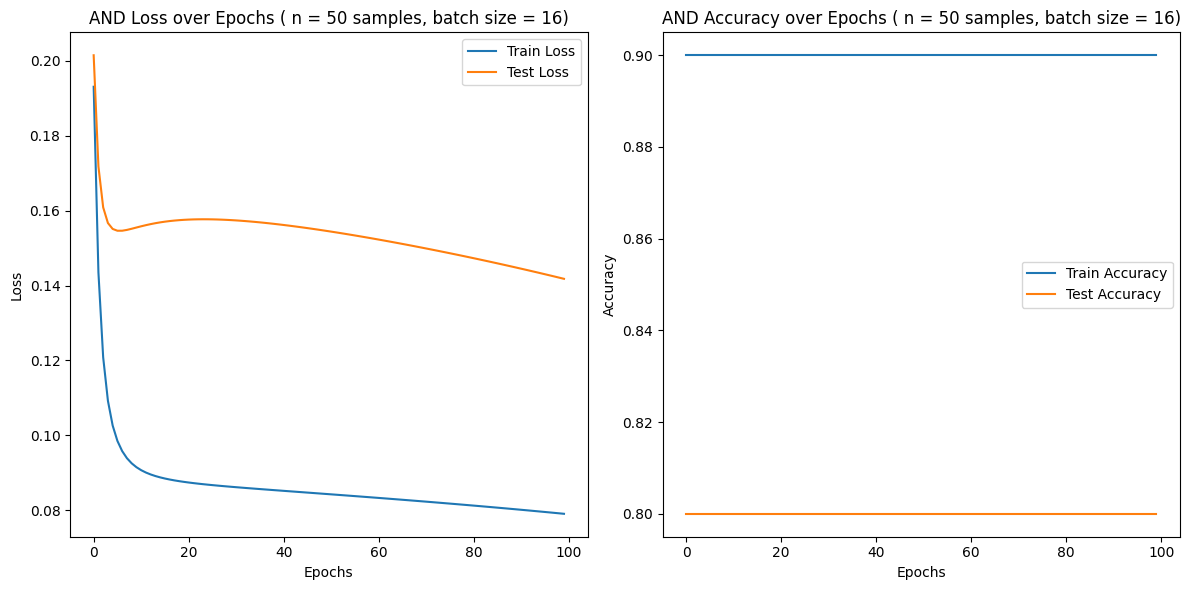

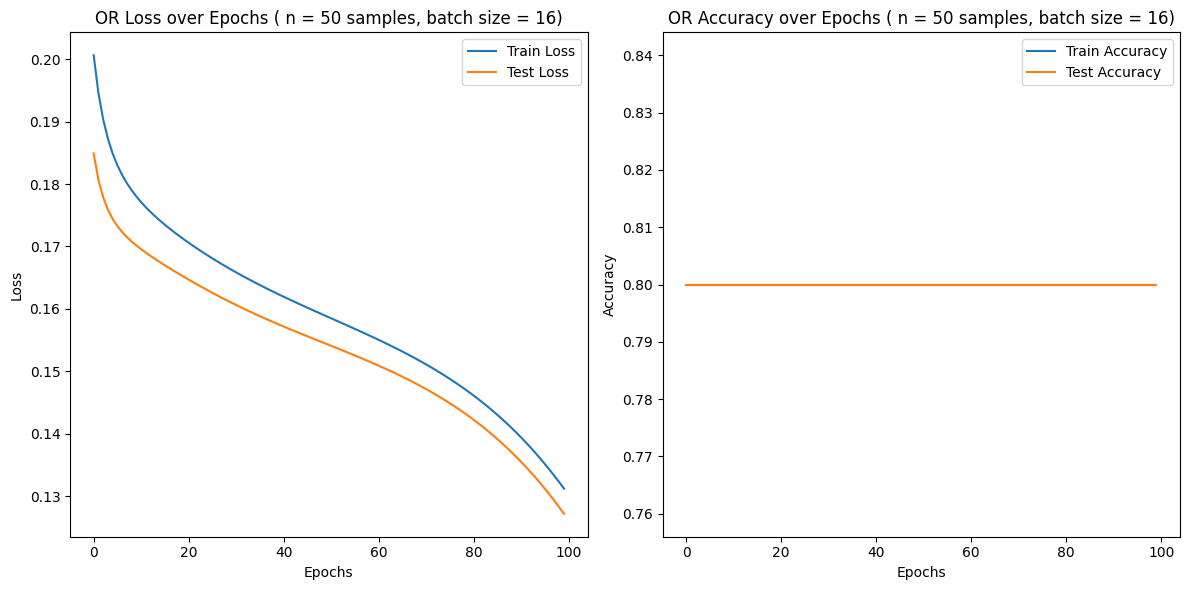

Training for XOR operation... with 500 samples
XOR Final Train Loss: 0.13175909595524685, Final Test Loss: 0.13093731163807354
XOR Final Train Accuracy: 0.77, Final Test Accuracy: 0.78

Training for AND operation... with 500 samples
AND Final Train Loss: 0.00212494771595769, Final Test Loss: 0.001710078572789442
AND Final Train Accuracy: 1.0, Final Test Accuracy: 1.0

Training for OR operation... with 500 samples
OR Final Train Loss: 0.0012059000401926365, Final Test Loss: 0.0008886589166535895
OR Final Train Accuracy: 1.0, Final Test Accuracy: 1.0



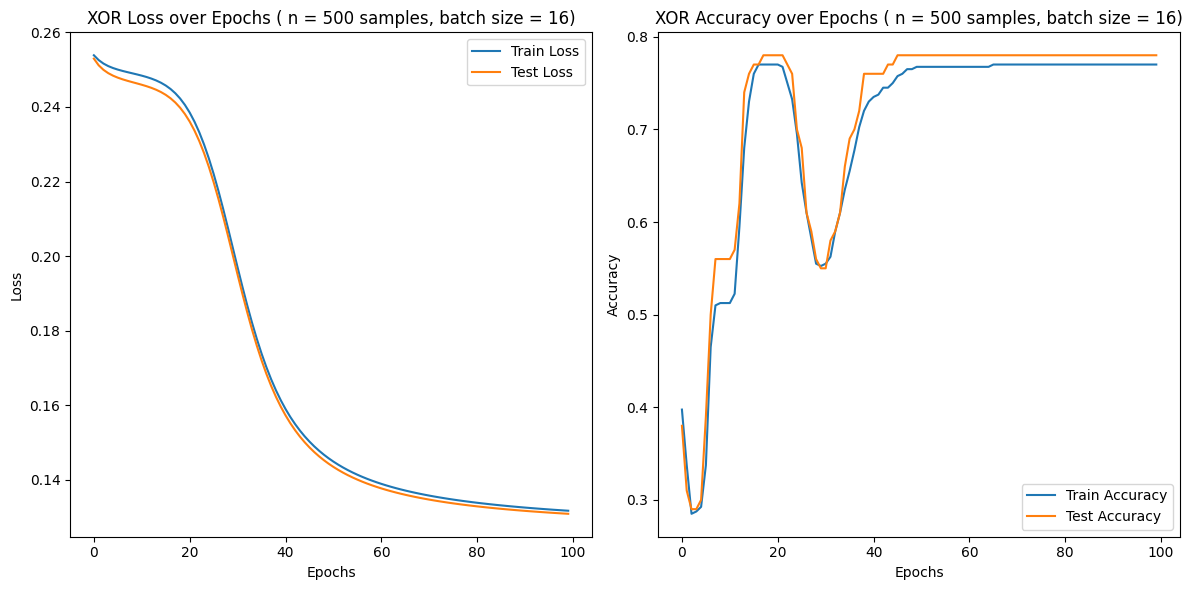

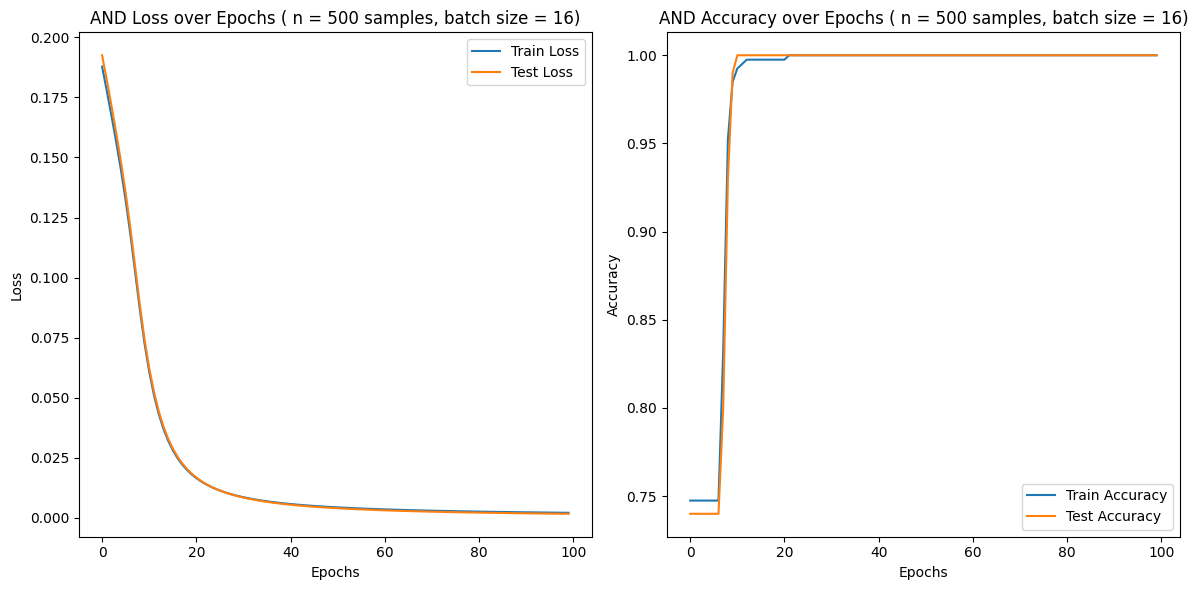

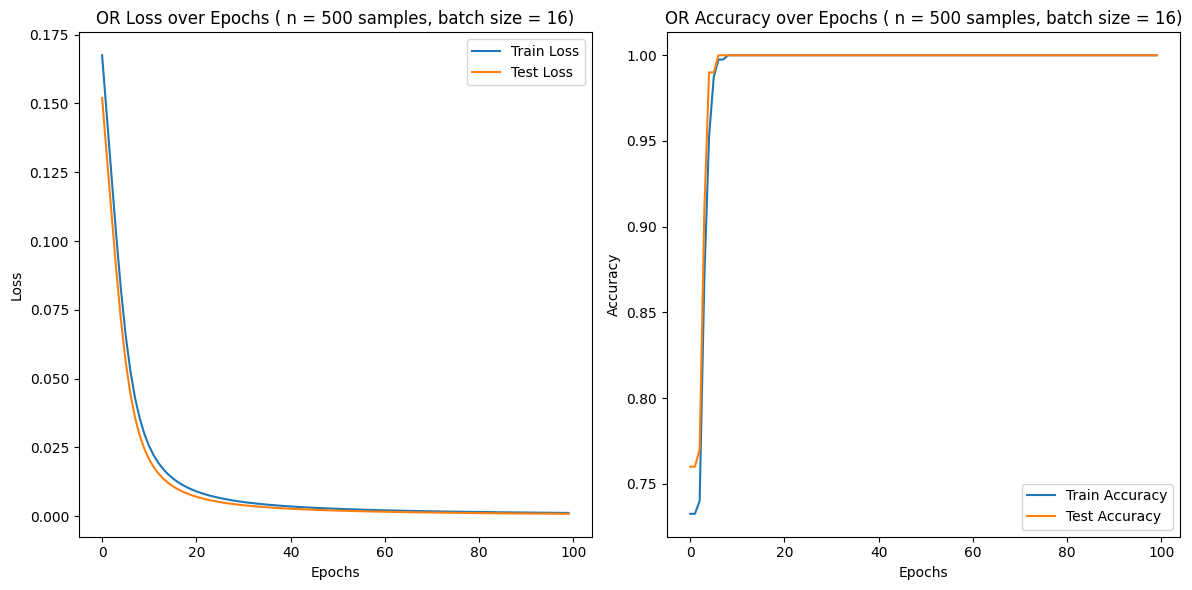

Training for XOR operation... with 1000 samples
XOR Final Train Loss: 0.0016483774043535343, Final Test Loss: 0.002229966831883994
XOR Final Train Accuracy: 1.0, Final Test Accuracy: 1.0

Training for AND operation... with 1000 samples
AND Final Train Loss: 0.0007047685455311769, Final Test Loss: 0.0008316708087477578
AND Final Train Accuracy: 1.0, Final Test Accuracy: 1.0

Training for OR operation... with 1000 samples
OR Final Train Loss: 0.0008720076464554478, Final Test Loss: 0.00033827901050011107
OR Final Train Accuracy: 1.0, Final Test Accuracy: 1.0



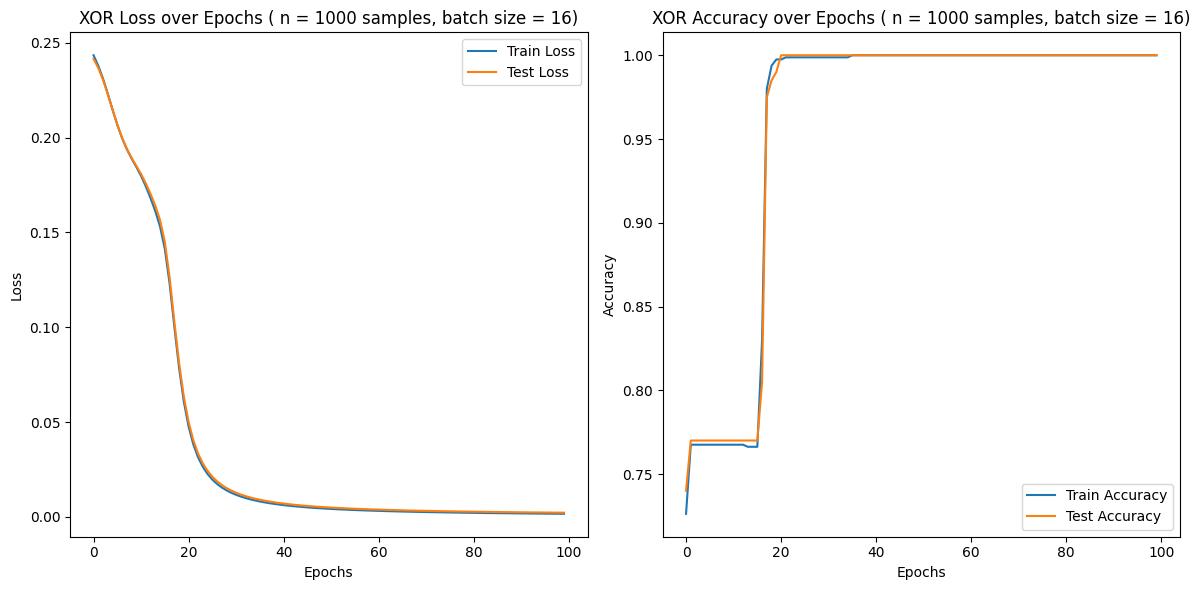

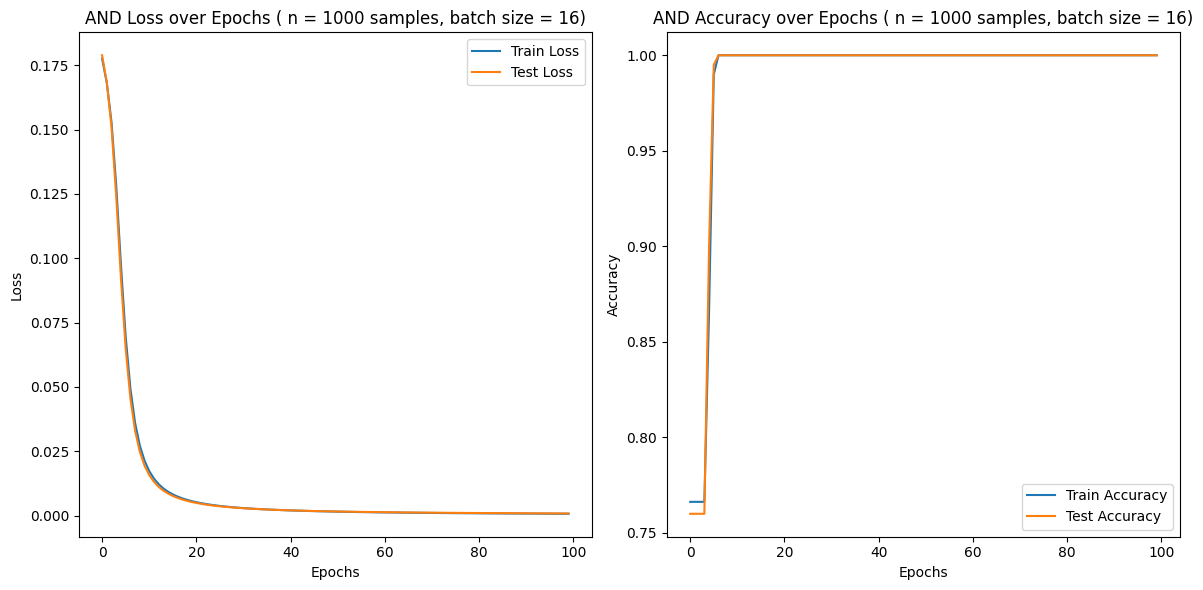

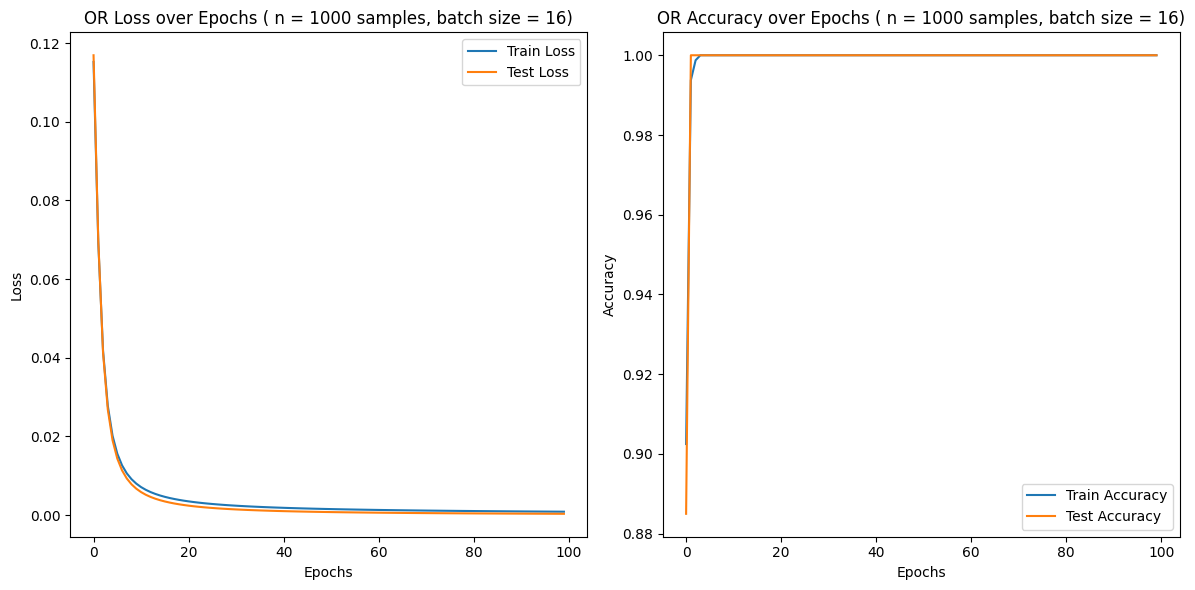

In [116]:
n_samples = [50, 500, 1000]
noise_level = 0.1
hidden_size = 2
epochs = 100
lr = 0.1
batch_size = 16
operations = ['XOR', 'AND', 'OR']


metrics = {}
for sample in n_samples:
    for operation in operations:
        print(f'Training for {operation} operation... with {sample} samples')
        

        X, X_noisy, y = generate_noisy_data(sample, operation, noise=noise_level)
        

        split_idx = int(0.8 * sample)
        X_train, X_test = X_noisy[:split_idx], X_noisy[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        

        train_loss, test_loss, train_acc, test_acc = train_network(X_train, y_train, X_test, y_test, hidden_size, epochs, lr, batch_size)
        

        metrics[operation] = {
            'train_loss': train_loss,
            'test_loss': test_loss,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'n_samples' : sample,
            'batch_size' : batch_size
        }
        

        print(f'{operation} Final Train Loss: {train_loss[-1]}, Final Test Loss: {test_loss[-1]}')
        print(f'{operation} Final Train Accuracy: {train_acc[-1]}, Final Test Accuracy: {test_acc[-1]}\n')


    plot_metrics(metrics, operations)

Increasing sample size seems to increase the accuracy but not necessarily in every case

3 different values of m (100 epochs)

Training for XOR operation... with batch size = 8
XOR Final Train Loss: 0.16776917687965306, Final Test Loss: 0.21546769499131352
XOR Final Train Accuracy: 0.8, Final Test Accuracy: 0.7

Training for AND operation... with batch size = 8
AND Final Train Loss: 0.011510404904783254, Final Test Loss: 0.01541682866429922
AND Final Train Accuracy: 1.0, Final Test Accuracy: 1.0

Training for OR operation... with batch size = 8
OR Final Train Loss: 0.00894232167823778, Final Test Loss: 0.015253528344645
OR Final Train Accuracy: 1.0, Final Test Accuracy: 1.0



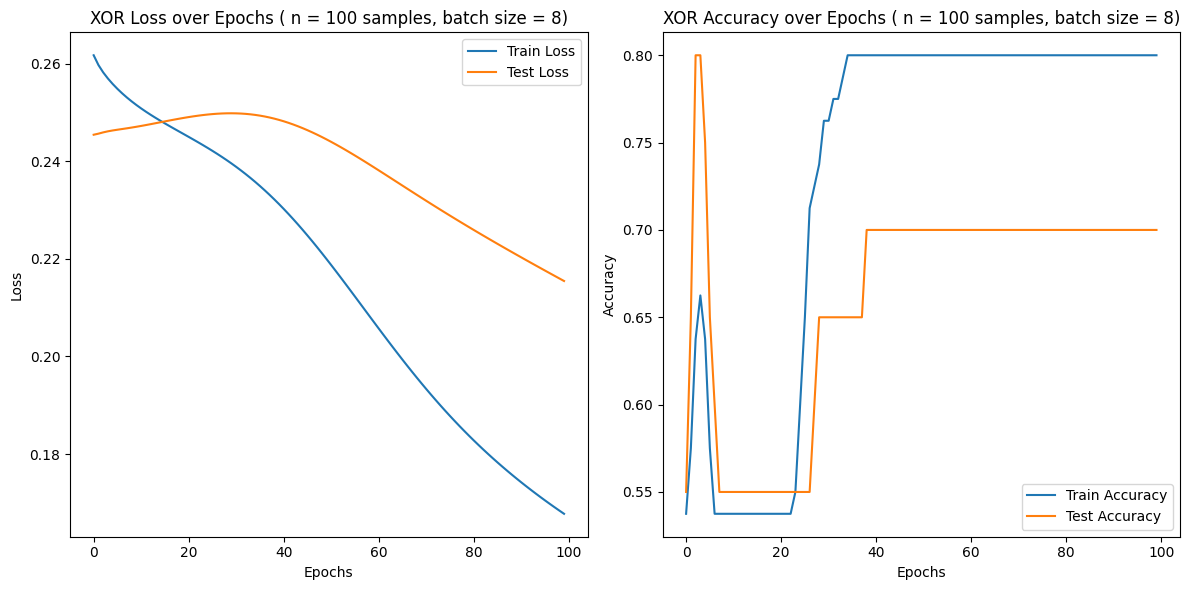

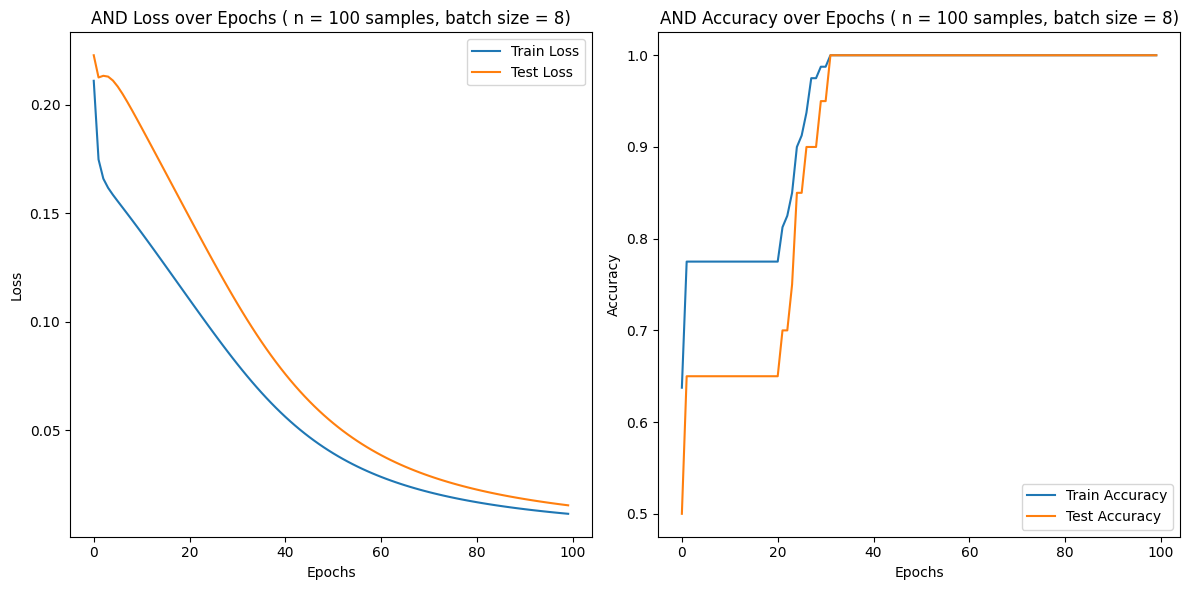

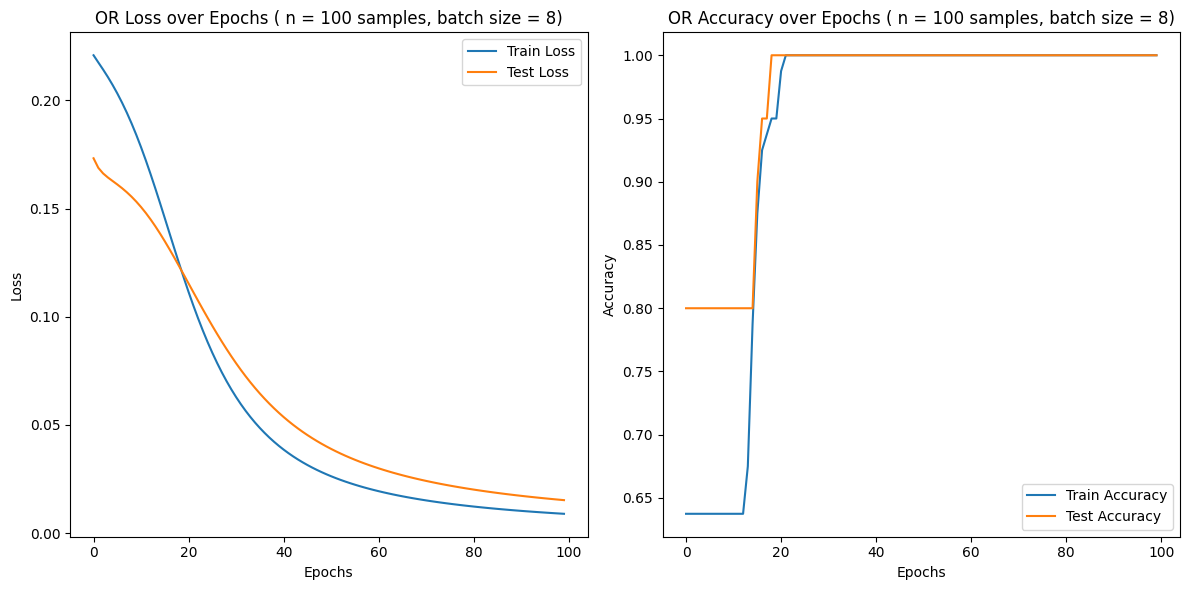

Training for XOR operation... with batch size = 16
XOR Final Train Loss: 0.16475157351609349, Final Test Loss: 0.16336274444181204
XOR Final Train Accuracy: 0.825, Final Test Accuracy: 0.85

Training for AND operation... with batch size = 16
AND Final Train Loss: 0.027170026164999667, Final Test Loss: 0.020641159144944205
AND Final Train Accuracy: 1.0, Final Test Accuracy: 1.0

Training for OR operation... with batch size = 16
OR Final Train Loss: 0.006540407368670618, Final Test Loss: 0.006345473357561302
OR Final Train Accuracy: 1.0, Final Test Accuracy: 1.0



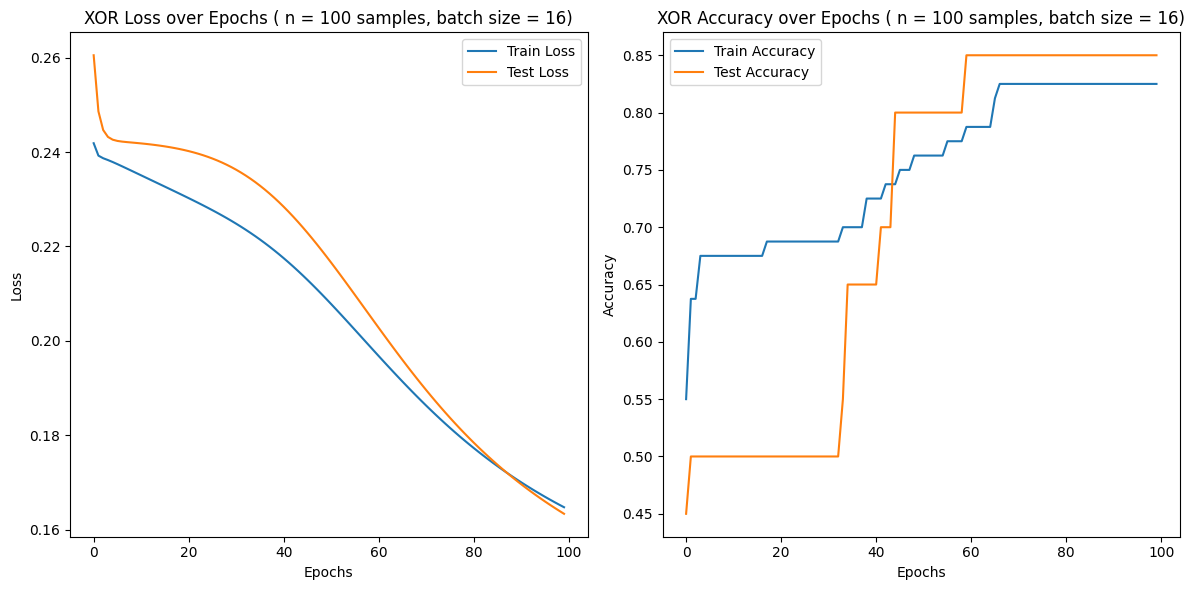

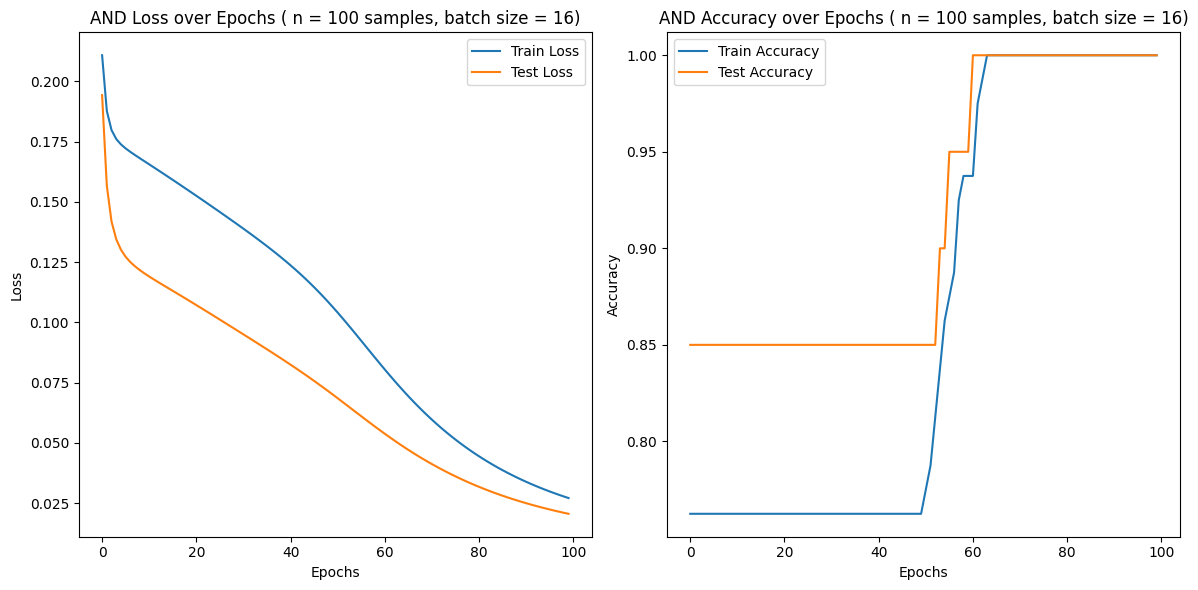

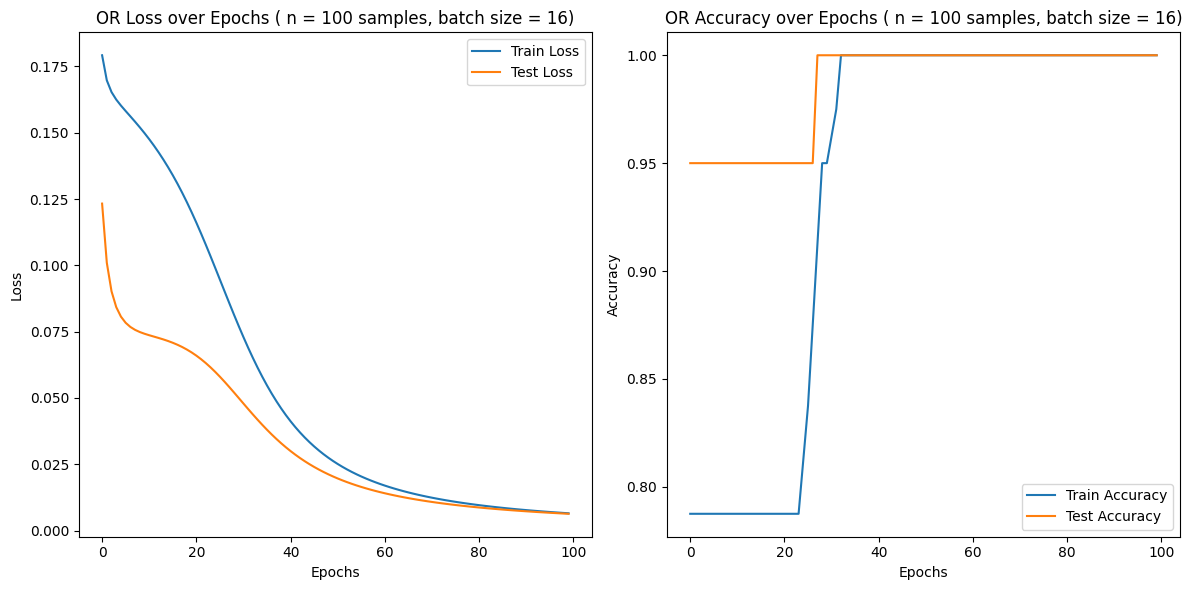

Training for XOR operation... with batch size = 32
XOR Final Train Loss: 0.20000528060816564, Final Test Loss: 0.20173619431713297
XOR Final Train Accuracy: 0.725, Final Test Accuracy: 0.75

Training for AND operation... with batch size = 32
AND Final Train Loss: 0.01794972354733585, Final Test Loss: 0.01866212789316297
AND Final Train Accuracy: 1.0, Final Test Accuracy: 1.0

Training for OR operation... with batch size = 32
OR Final Train Loss: 0.00763810048404652, Final Test Loss: 0.01942833001338602
OR Final Train Accuracy: 1.0, Final Test Accuracy: 1.0



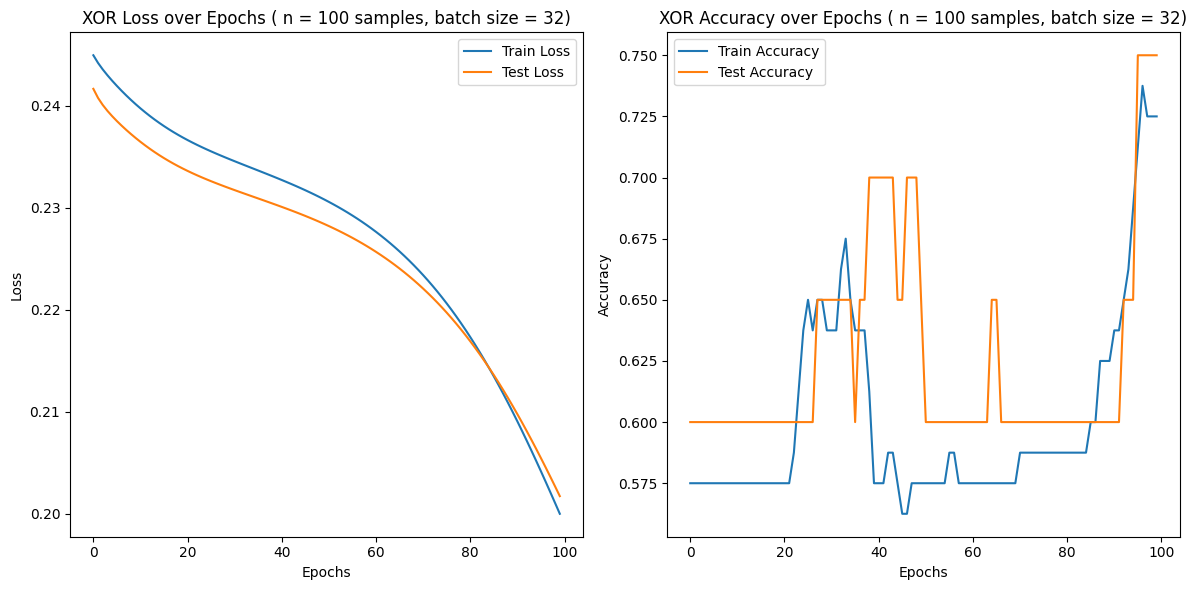

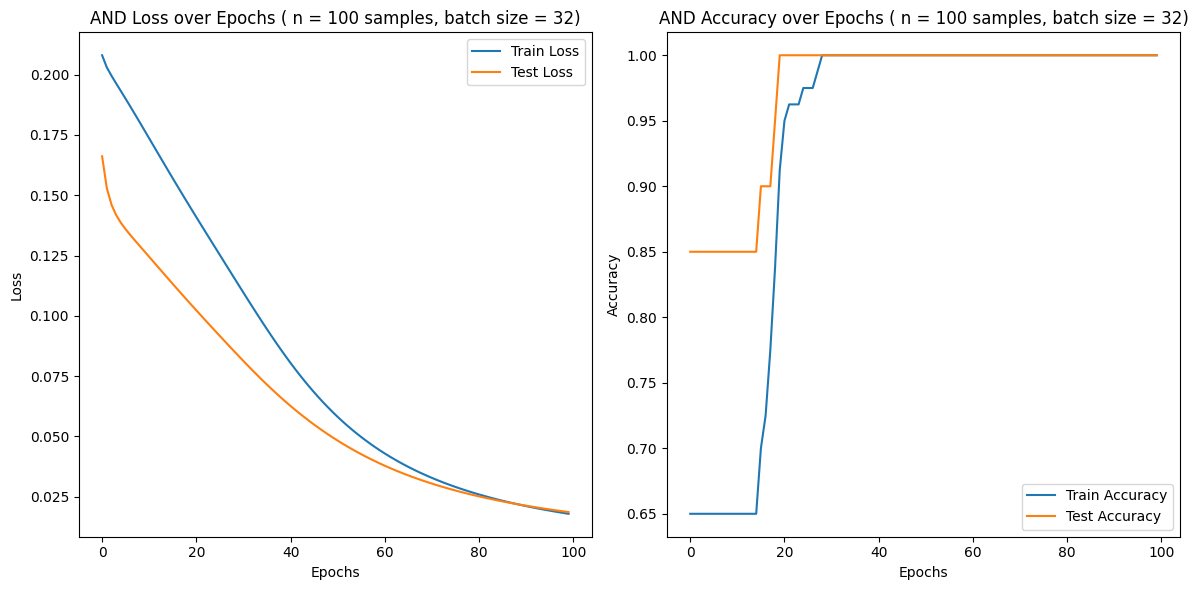

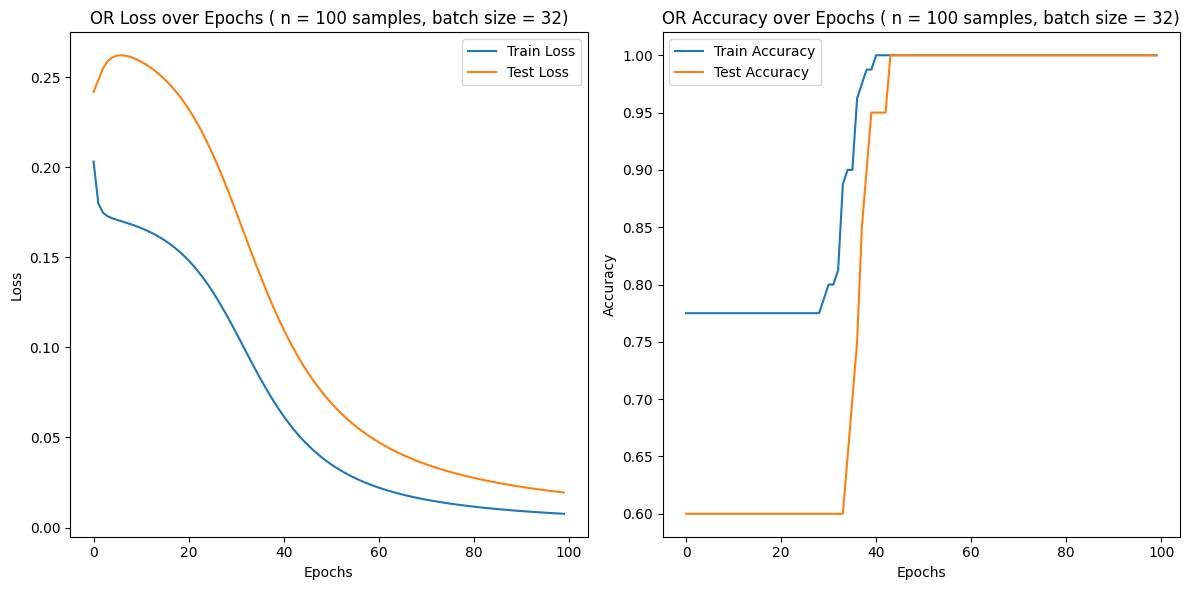

In [117]:
n_samples = 100
noise_level = 0.1
hidden_size = 2
epochs = 100
lr = 0.1
batch_size = [8, 16, 32]
operations = ['XOR', 'AND', 'OR']


metrics = {}

for b_size in batch_size:
    for operation in operations:
        print(f'Training for {operation} operation... with batch size = {b_size}')
        

        X, X_noisy, y = generate_noisy_data(n_samples, operation, noise=noise_level)
        

        split_idx = int(0.8 * n_samples)
        X_train, X_test = X_noisy[:split_idx], X_noisy[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        

        train_loss, test_loss, train_acc, test_acc = train_network(X_train, y_train, X_test, y_test, hidden_size, epochs, lr, b_size)
        

        metrics[operation] = {
            'train_loss': train_loss,
            'test_loss': test_loss,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'n_samples' : n_samples,
            'batch_size' : b_size
        }
        

        print(f'{operation} Final Train Loss: {train_loss[-1]}, Final Test Loss: {test_loss[-1]}')
        print(f'{operation} Final Train Accuracy: {train_acc[-1]}, Final Test Accuracy: {test_acc[-1]}\n')


    plot_metrics(metrics, operations)